## The problem and data

##### Useful link - https://arxiv.org/pdf/1308.5499.pdf

##### The level of clothing a person is wearing at office is one of the key factors influencing their level of comfort. This assignment aims to model clothing insulation based on:
1. Indoor operating temperature and outdoor temperature (clothingSum.csv).
2. Indoor operating temperature, outdoor temperature and subject ID (clothingSum.csv).
3. Indoor operating temperature, outdoor temperature, subject ID and observation number (clothingFull.csv).

## Problem 1: General linear model

##### Reading the data

In [3]:
setwd("~/Desktop/DTU/Advanced\ Dataanalysis\ and\ Statistical\ Modelling/Assignments")
HE <- read.table("clothingSum.csv", sep=",", header=TRUE, as.is=TRUE)

#### Define all needed libraries

In [5]:
library(ggplot2); suppressWarnings(suppressMessages(library("ggplot2")))
library(MASS); suppressWarnings(suppressMessages(library("MASS")))
library(dplyr); suppressWarnings(suppressMessages(library("dplyr")))
library(corrplot); suppressWarnings(suppressMessages(library("corrplot")))
library(mgcv); suppressWarnings(suppressMessages(library("mgcv")))
library(lmerTest); suppressWarnings(suppressMessages(library("lmerTest")))
library(repr); suppressWarnings(suppressMessages(library("lmerTest")))
library(car); suppressWarnings(suppressMessages(library("car")))

#### Adjust the size of all plots to 5 x 5

In [6]:
options(repr.plot.width=5, repr.plot.height=5)

#### Summary of data

In [7]:
head(HE)

subjId,day,clo,tOut,tInOp,sex
11,1,0.71,20.48765,25.44297,female
17,1,0.65,16.55730,23.16285,female
19,1,0.87,14.54109,24.55617,female
29,1,0.56,20.21969,27.01763,female
35,1,0.34,25.25117,28.61374,male
43,1,0.79,25.22943,27.07381,female


In [8]:
str(HE)

'data.frame':	136 obs. of  6 variables:
 $ subjId: int  11 17 19 29 35 43 47 49 51 55 ...
 $ day   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ clo   : num  0.71 0.65 0.87 0.56 0.34 ...
 $ tOut  : num  20.5 16.6 14.5 20.2 25.3 ...
 $ tInOp : num  25.4 23.2 24.6 27 28.6 ...
 $ sex   : chr  "female" "female" "female" "female" ...


In [9]:
summary(HE)

     subjId           day             clo              tOut      
 Min.   : 11.0   Min.   :1.000   Min.   :0.2467   Min.   :11.93  
 1st Qu.: 59.0   1st Qu.:1.000   1st Qu.:0.4700   1st Qu.:18.57  
 Median : 99.0   Median :2.000   Median :0.5483   Median :21.01  
 Mean   :101.1   Mean   :1.978   Mean   :0.5511   Mean   :21.54  
 3rd Qu.:141.0   3rd Qu.:3.000   3rd Qu.:0.6412   3rd Qu.:24.25  
 Max.   :199.0   Max.   :4.000   Max.   :0.9600   Max.   :33.08  
     tInOp           sex           
 Min.   :23.11   Length:136        
 1st Qu.:26.01   Class :character  
 Median :26.94   Mode  :character  
 Mean   :26.82                     
 3rd Qu.:27.48                     
 Max.   :29.55                     

#### Exclude a subset of attributes

In [10]:
myvars <- names(HE) %in% c("sex", "subjId", "day")
HE_subset <- HE[!myvars]

### Correlation plots

[1] "clo"   "tOut"  "tInOp"

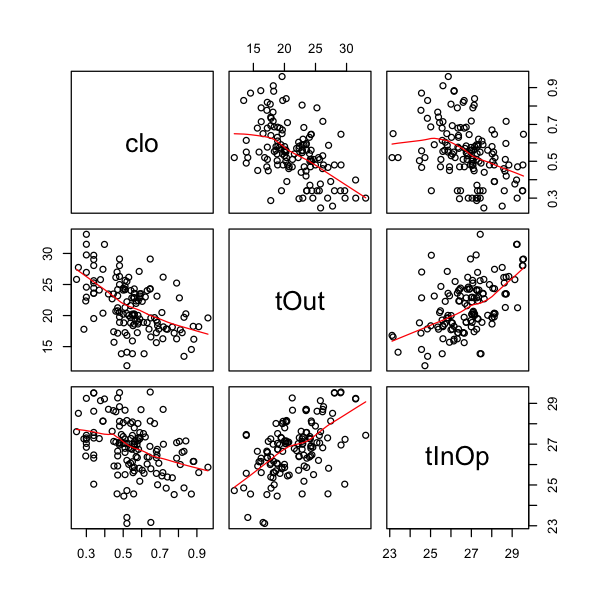

In [11]:
names(HE_subset)
attach(HE_subset)
pairs(HE_subset,panel=panel.smooth)

1. Level of clothing decreases if the outdoor temperature increases (i.e people tend to wear lighter cloths in warmer days).
2. Level of clothing decreases if the outdoor temperature increases. However, the effect is less significant that in the outdoor temperature case.
3. An increase in the outdoor temperature determines and increase in the indoor temperature.

#### Covariance matrix for the level of clothing, outdoor temperature and indoor temperature

In [12]:
cov(HE_subset)

,clo,tOut,tInOp
clo,0.02295290,-0.3220363,-0.07552588
tOut,-0.32203627,17.2760368,2.79966891
tInOp,-0.07552588,2.7996689,1.69431442


#### Correlation matrix for the level of clothing, outdoor temperature and indoor temperature

,clo,tOut,tInOp
clo,1.0000000,-0.5114038,-0.3829834
tOut,-0.5114038,1.0000000,0.5174729
tInOp,-0.3829834,0.5174729,1.0000000


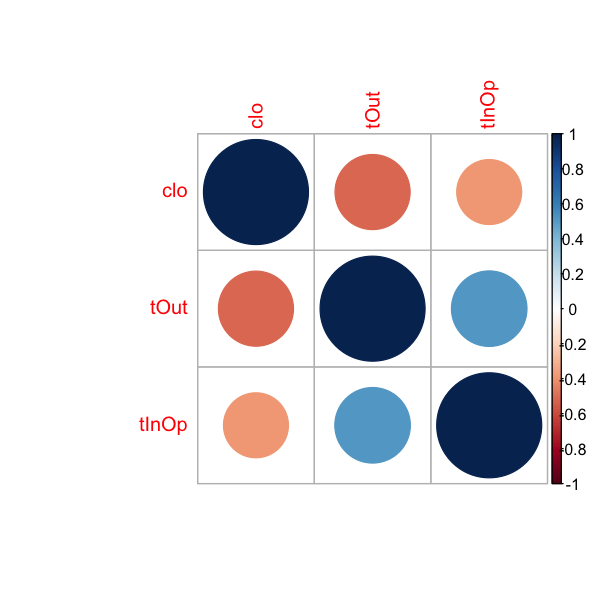

In [13]:
cor(HE_subset)
corrplot(cor(HE_subset))

### Gam plot to get an idea of relationships

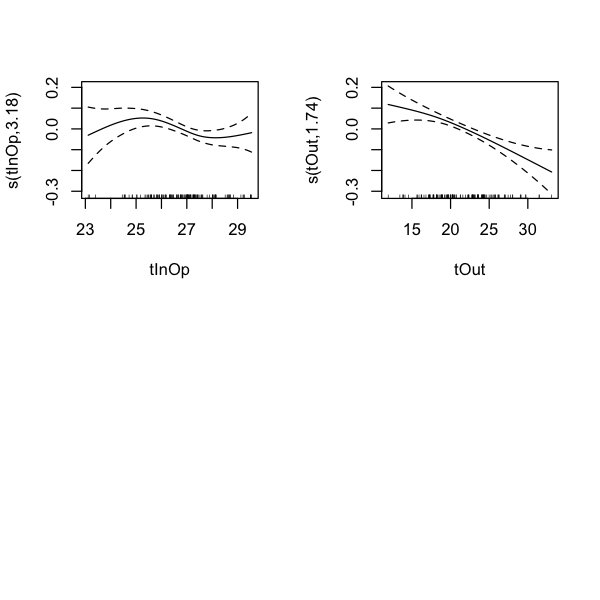

In [14]:
par(mfrow=c(2,2))
model<-gam(clo ~ s(tInOp) + s(tOut),data=HE_subset)
plot(model)

### Histogram for the temperature

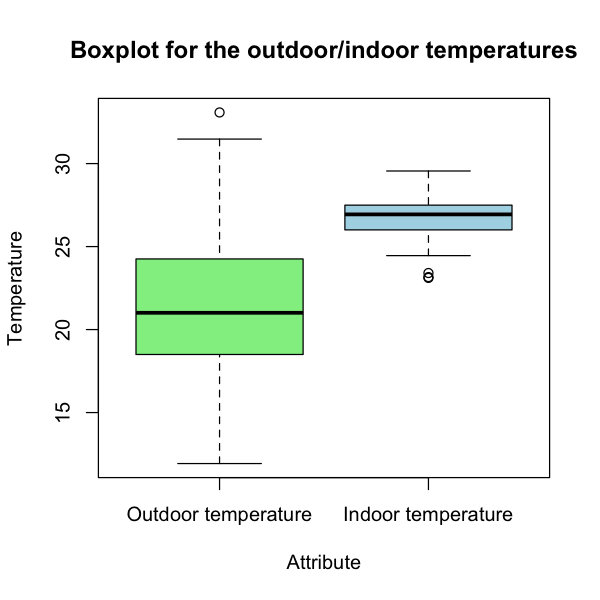

In [15]:
boxplot(HE$tOut, HE$tInOp,
        names=c("Outdoor temperature", "Indoor temperature"), 
        xlab="Attribute", ylab="Temperature", main="Boxplot for the outdoor/indoor temperatures", col=c("lightgreen","Lightblue"))

1. Outdoor temperature is more spread compared to the indoor temperature.
2. Outdoor temperature's mean is 21.54 with an IQR = Q3-Q1 = 24.25-18.57 = 5.68.
3. Indoor temperature's mean is 26.82 with an IQR = Q3-Q1 = 27.48-26.01 = 1.47.

### Simple linear regression for level of clothing (clo) based on outdoor temperature (tOut)

Warning message in predict.lm(fit_tOut, interval = "prediction"):
“predictions on current data refer to _future_ responses
”

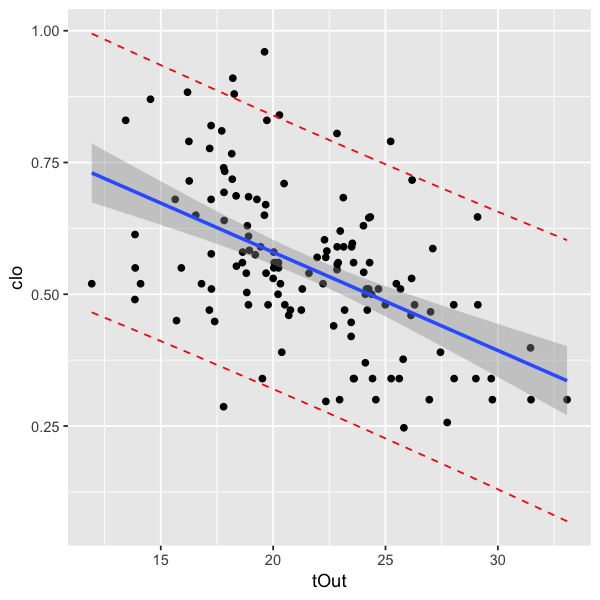

In [16]:
# 1. Add predictions 
fit_tOut <- lm(clo ~ tOut, data = HE)
pred.int <- predict(fit_tOut, interval = "prediction")
mydata <- cbind(HE, pred.int)

# 2. Regression line + confidence intervals
p <- ggplot(mydata, aes(tOut, clo)) + geom_point() + stat_smooth(method = lm)

# 3. Add prediction intervals
p + geom_line(aes(y = lwr), color = "red", linetype = "dashed") + geom_line(aes(y = upr), color = "red", linetype = "dashed")

### Simple linear regression for level of clothing (clo) based on indoor temperature (tInOp)

Warning message in predict.lm(fit_tInOp, interval = "prediction"):
“predictions on current data refer to _future_ responses
”

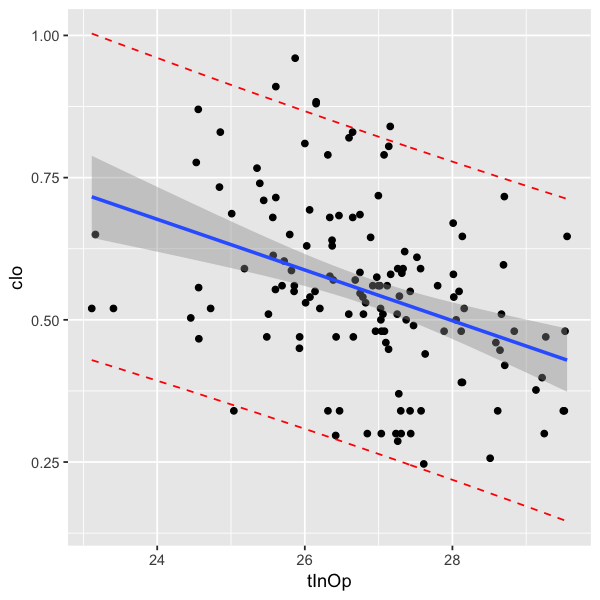

In [17]:
fit_tInOp <- lm(clo ~ tInOp, data = HE)
pred.int <- predict(fit_tInOp, interval = "prediction")
mydata <- cbind(HE, pred.int)
p <- ggplot(mydata, aes(tInOp, clo)) + geom_point() + stat_smooth(method = lm)
p + geom_line(aes(y = lwr), color = "red", linetype = "dashed") + geom_line(aes(y = upr), color = "red", linetype = "dashed")

Considering both sexes for level of clothing based on outdoor/indoor temperatures:
1. The level of clothing decreases when the outdoor / indoor temperature increases.
2. A few datapoints fall witin the confidence interval of the simple regression line.
3. Our dataset has a few outliers that do not meet even the prediction interval of the simple regression line.

### Fit general linear model to the data (i.e find the best model by incremental reduction)

#### Initiate the model with some possibly significant variables


Call:
lm(formula = clo ~ sex * tOut * tInOp + I((tInOp - mean(I(tInOp)))^2) + 
    I((tOut - mean(I(tOut)))^2), data = HE)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32526 -0.05233  0.00484  0.04728  0.30105 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)   
(Intercept)                    6.7973872  2.0783109   3.271  0.00138 **
sexmale                       -5.1269781  2.0533585  -2.497  0.01382 * 
tOut                          -0.2422223  0.0968907  -2.500  0.01371 * 
tInOp                         -0.2177495  0.0773724  -2.814  0.00567 **
I((tInOp - mean(I(tInOp)))^2) -0.0077002  0.0063222  -1.218  0.22551   
I((tOut - mean(I(tOut)))^2)   -0.0014177  0.0005865  -2.417  0.01707 * 
sexmale:tOut                   0.2098350  0.0960544   2.185  0.03077 * 
sexmale:tInOp                  0.1822961  0.0774553   2.354  0.02014 * 
tOut:tInOp                     0.0084150  0.0035811   2.350  0.02034 * 
sexmale:tOut:tInOp            -0.0075

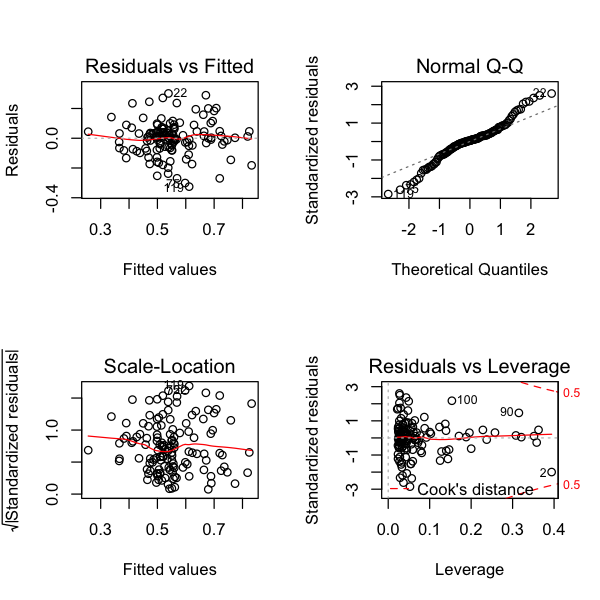

In [18]:
model_1<-lm(clo ~ sex*tOut*tInOp
                + I((tInOp - mean(I(tInOp)))^2) + I((tOut - mean(I(tOut)))^2), 
           data = HE)
summary(model_1)

par(mfrow=c(2,2))
plot(model_1)

1. Most of the variables show significant effect on the level of clothing.
2. The most significant appears to be the indoor temperature (i.e tInOp), the sex (i.e our example "male") and the normalized outdoor temperature (i.e I((tOut - mean(I(tOut)))^2)).
3. The least significant effect on level of clothing is shown by the normalized indoor temperature (i.e I((tInOp - mean(I(tInOp)))^2)).

#### To reduce the significance of sparse datapoints, we test the model on the logarithmic scale


Call:
lm(formula = log(clo) ~ sex * tOut * tInOp + I((tInOp - mean(I(tInOp)))^2) + 
    I((tOut - mean(I(tOut)))^2), data = HE)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72531 -0.09690  0.03082  0.10849  0.48764 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)   
(Intercept)                    9.920277   4.074593   2.435  0.01631 * 
sexmale                       -9.140789   4.025673  -2.271  0.02487 * 
tOut                          -0.417332   0.189957  -2.197  0.02985 * 
tInOp                         -0.363729   0.151691  -2.398  0.01796 * 
I((tInOp - mean(I(tInOp)))^2) -0.010186   0.012395  -0.822  0.41276   
I((tOut - mean(I(tOut)))^2)   -0.003079   0.001150  -2.678  0.00839 **
sexmale:tOut                   0.391079   0.188318   2.077  0.03986 * 
sexmale:tInOp                  0.326656   0.151853   2.151  0.03337 * 
tOut:tInOp                     0.014311   0.007021   2.038  0.04360 * 
sexmale:tOut:tInOp            -0.014065   

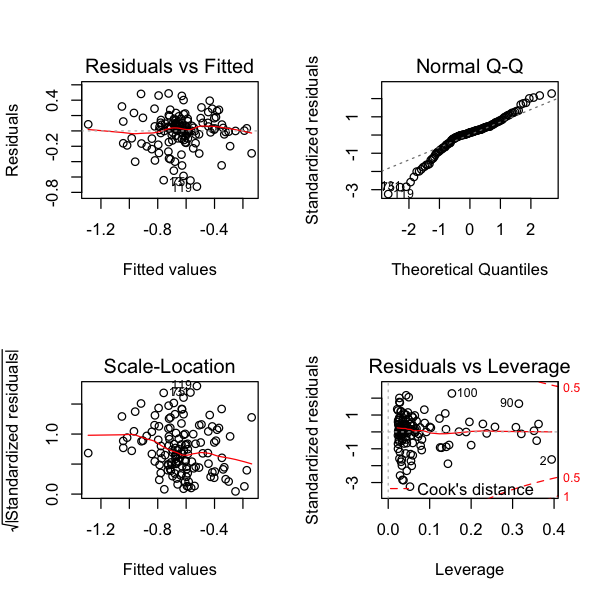

In [19]:
model_2<-lm(log(clo) ~ sex*tOut*tInOp
                + I((tInOp - mean(I(tInOp)))^2) + I((tOut - mean(I(tOut)))^2), 
           data = HE)
summary(model_2)

par(mfrow=c(2,2))
plot(model_2)

1. Even less significance is seen on most of the variables.
2. A larger significance compared to the linear model is seen from the normalized ourdoor temperature on the level of clothing (i.e I((tOut - mean(I(tOut)))^2))

#### Continue with linear model by reducing incrementally the least significant variables form the model

View which attribute is recommended to be dropped (i.e based on the p-value)

In [20]:
drop1(model_1, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,1.731743,-573.4396,NA,NA
I((tInOp - mean(I(tInOp)))^2),1,0.02038835,1.752131,-573.8478,1.483437,0.22551338
I((tOut - mean(I(tOut)))^2),1,0.08031329,1.812056,-569.2742,5.843520,0.01706642
sex:tOut:tInOp,1,0.06091153,1.792654,-570.7382,4.431866,0.03725964


In [21]:
model_1a <- update(model_1,~. -I((tInOp - mean(I(tInOp)))^2))
summary(model_1a)
drop1(model_1a, test="F")


Call:
lm(formula = clo ~ sex + tOut + tInOp + I((tOut - mean(I(tOut)))^2) + 
    sex:tOut + sex:tInOp + tOut:tInOp + sex:tOut:tInOp, data = HE)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32622 -0.05260  0.00804  0.04995  0.30570 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)   
(Intercept)                  5.2138538  1.6245000   3.210  0.00168 **
sexmale                     -4.9043505  2.0490956  -2.393  0.01816 * 
tOut                        -0.1672483  0.0749660  -2.231  0.02744 * 
tInOp                       -0.1592727  0.0607895  -2.620  0.00986 **
I((tOut - mean(I(tOut)))^2) -0.0013168  0.0005817  -2.264  0.02529 * 
sexmale:tOut                 0.1893942  0.0947567   1.999  0.04777 * 
sexmale:tInOp                0.1749455  0.0773666   2.261  0.02544 * 
tOut:tInOp                   0.0056389  0.0027674   2.038  0.04366 * 
sexmale:tOut:tInOp          -0.0068153  0.0035327  -1.929  0.05593 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘*

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,1.752131,-573.8478,NA,NA
I((tOut - mean(I(tOut)))^2),1,0.07069909,1.822830,-570.4680,5.124493,0.02528690
sex:tOut:tInOp,1,0.05134844,1.803480,-571.9194,3.721897,0.05593395


In [22]:
model_1b <- update(model_1a,~. -sex:tOut:tInOp)
summary(model_1b)
drop1(model_1b, test="F")


Call:
lm(formula = clo ~ sex + tOut + tInOp + I((tOut - mean(I(tOut)))^2) + 
    sex:tOut + sex:tInOp + tOut:tInOp, data = HE)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.34150 -0.05054  0.00726  0.05553  0.31695 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)  
(Intercept)                  3.0496758  1.1874130   2.568   0.0114 *
sexmale                     -1.0515171  0.4635633  -2.268   0.0250 *
tOut                        -0.0646610  0.0534007  -1.211   0.2282  
tInOp                       -0.0791587  0.0448644  -1.764   0.0801 .
I((tOut - mean(I(tOut)))^2) -0.0009917  0.0005626  -1.763   0.0804 .
sexmale:tOut                 0.0069894  0.0063459   1.101   0.2728  
sexmale:tInOp                0.0303041  0.0192939   1.571   0.1187  
tOut:tInOp                   0.0018571  0.0019740   0.941   0.3486  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1187 on 128 degrees of freedom
Multip

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,1.803480,-571.9194,NA,NA
I((tOut - mean(I(tOut)))^2),1,0.04377061,1.847250,-570.6581,3.1065717,0.08036376
sex:tOut,1,0.01709184,1.820571,-572.6366,1.2130748,0.27279082
sex:tInOp,1,0.03475866,1.838238,-571.3232,2.4669583,0.11873145
tOut:tInOp,1,0.01247050,1.815950,-572.9823,0.8850803,0.34858607


In [23]:
model_1c <- update(model_1b,~. -tOut:tInOp)
summary(model_1c)
drop1(model_1c, test="F")


Call:
lm(formula = clo ~ sex + tOut + tInOp + I((tOut - mean(I(tOut)))^2) + 
    sex:tOut + sex:tInOp, data = HE)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.34969 -0.04962  0.00365  0.05653  0.31564 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  1.9804786  0.3438457   5.760 5.85e-08 ***
sexmale                     -1.0591847  0.4632852  -2.286  0.02387 *  
tOut                        -0.0146150  0.0046711  -3.129  0.00217 ** 
tInOp                       -0.0393951  0.0150390  -2.620  0.00986 ** 
I((tOut - mean(I(tOut)))^2) -0.0007252  0.0004859  -1.492  0.13803    
sexmale:tOut                 0.0060284  0.0062604   0.963  0.33738    
sexmale:tInOp                0.0312334  0.0192601   1.622  0.10732    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1186 on 129 degrees of freedom
Multiple R-squared:  0.414,	Adjusted R-squared:  0.3867 
F-statistic: 15

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,1.815950,-572.9823,NA,NA
I((tOut - mean(I(tOut)))^2),1,0.03135374,1.847304,-572.6542,2.2272816,0.1380338
sex:tOut,1,0.01305318,1.829003,-574.0082,0.9272613,0.3373772
sex:tInOp,1,0.03702016,1.852970,-572.2376,2.6298083,0.1073160


In [24]:
model_1d <- update(model_1c,~. -sex:tOut)
summary(model_1d)
drop1(model_1d, test="F")


Call:
lm(formula = clo ~ sex + tOut + tInOp + I((tOut - mean(I(tOut)))^2) + 
    sex:tInOp, data = HE)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33570 -0.05331  0.00294  0.05664  0.30944 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  2.1147033  0.3142372   6.730 4.91e-10 ***
sexmale                     -1.1848488  0.4444011  -2.666 0.008646 ** 
tOut                        -0.0112059  0.0030463  -3.679 0.000342 ***
tInOp                       -0.0469913  0.0128004  -3.671 0.000351 ***
I((tOut - mean(I(tOut)))^2) -0.0008547  0.0004668  -1.831 0.069354 .  
sexmale:tInOp                0.0407064  0.0165535   2.459 0.015244 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1186 on 130 degrees of freedom
Multiple R-squared:  0.4097,	Adjusted R-squared:  0.387 
F-statistic: 18.05 on 5 and 130 DF,  p-value: 1.442e-13


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,1.829003,-574.0082,NA,NA
tOut,1,0.19038310,2.019386,-562.5411,13.531853,0.0003422157
I((tOut - mean(I(tOut)))^2),1,0.04718046,1.876184,-572.5445,3.353444,0.0693542115
sex:tInOp,1,0.08507754,1.914081,-569.8248,6.047054,0.0152442025



Call:
lm(formula = clo ~ sex + tOut + tInOp + sex:tInOp, data = HE)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33392 -0.05325  0.00402  0.05806  0.31712 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.132395   0.316897   6.729 4.83e-10 ***
sexmale       -1.283448   0.445072  -2.884 0.004596 ** 
tOut          -0.012204   0.003024  -4.036 9.19e-05 ***
tInOp         -0.047494   0.012912  -3.678 0.000342 ***
sexmale:tInOp  0.044600   0.016563   2.693 0.008013 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1197 on 131 degrees of freedom
Multiple R-squared:  0.3945,	Adjusted R-squared:  0.376 
F-statistic: 21.34 on 4 and 131 DF,  p-value: 1.434e-13


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,1.876184,-572.5445,NA,NA
tOut,1,0.2332923,2.109476,-558.6053,16.289072,9.194695e-05
sex:tInOp,1,0.1038464,1.980030,-567.2178,7.250824,8.013277e-03


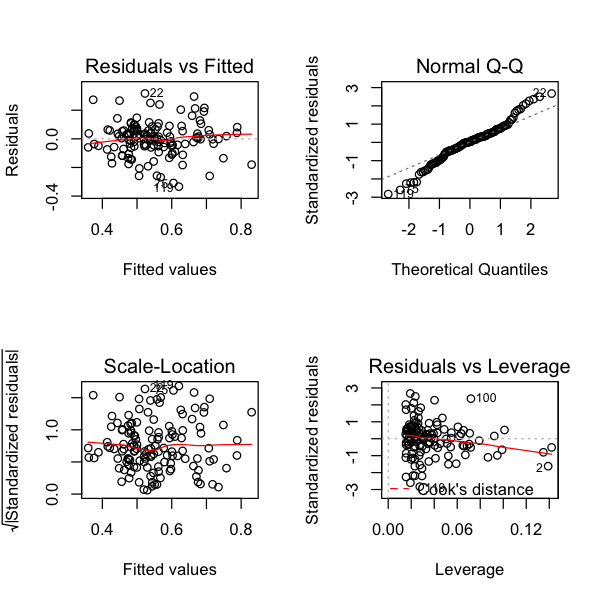

In [25]:
model_1e <- update(model_1d,~. -I((tOut - mean(I(tOut)))^2))
summary(model_1e)
drop1(model_1e, test="F")

par(mfrow=c(2,2))
plot(model_1e)

Once a very significant effect is seen from all the variables in the final model (i.e model_1e), it is fair to conclude that the model reflects the dependancy of level of clothing (i.e clo) as a factor of over variables quite well.

### Weighted analysis for sexes

#### Visualization for the temperature spread across sexes

In [26]:
fem <- subset(HE, (sex == 'female'));
male <- subset(HE, (sex == 'male'));

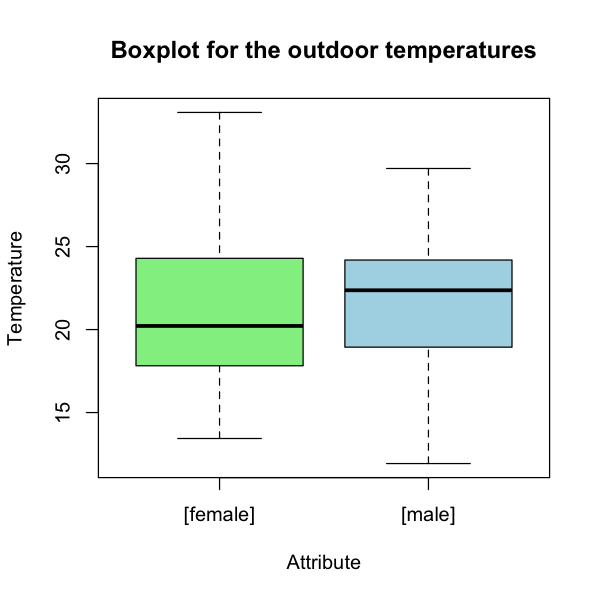

In [27]:
boxplot(fem$tOut, male$tOut,
        names=c("[female]", "[male]"), 
        xlab="Attribute", ylab="Temperature", main="Boxplot for the outdoor temperatures", col=c("lightgreen","Lightblue"))

1. Data points for females are spread out over temperature more than the ones for males.
2. Mean outdoor temperature for females is lower than the one more males.
3. Minimum temperature is recorded for males, while maximum - for females.

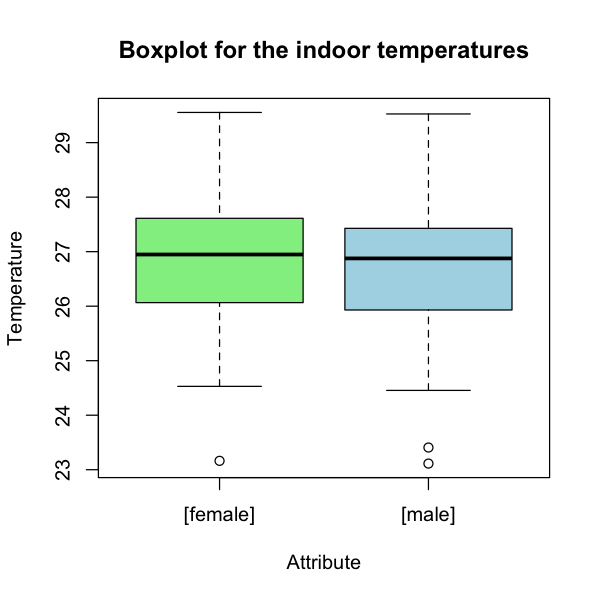

In [28]:
boxplot(fem$tInOp, male$tInOp,
        names=c("[female]", "[male]"), 
        xlab="Attribute", ylab="Temperature", main="Boxplot for the indoor temperatures", col=c("lightgreen","Lightblue"))

1. Indoor temperature is more or less evenly distributed between sexes.
2. Females register one outlier, while males have two outliers (i.e data point out of the 1.5*IQR).
3. The mean of the indoor temperature is slightly bigger than the one for males.

### Histogram for the level of clothing

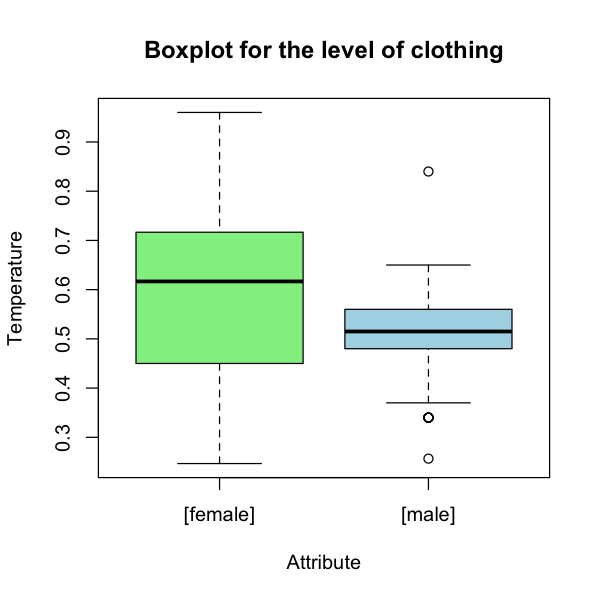

In [29]:
fem <- subset(HE, (sex == 'female'));
male <- subset(HE, (sex == 'male'));

boxplot(fem$clo, male$clo,
        names=c("[female]", "[male]"), 
        xlab="Attribute", ylab="Temperature", main="Boxplot for the level of clothing", col=c("lightgreen","Lightblue"))

1. The level of clothing for females is significantly more spread out than the one for males.
2. The mean level of clothing is higher for females.
3. There are no outliers (i.e out of the 1.5*IQR data points) for females, while we have a few for males.

### Find optimal variance matrix

In [70]:
# Sort data by sex
data_f = subset(HE, sex=="female")
data_m = subset(HE, sex=="male")
data = rbind(data_m, data_f)

In [71]:
lm_model1 = lm(clo ~ sex + tOut + tInOp + sex:tInOp, data=HE)
summary(lm_model1)
lm_pred1 = predict(lm_model1, data=data)


Call:
lm(formula = clo ~ sex + tOut + tInOp + sex:tInOp, data = HE)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33392 -0.05325  0.00402  0.05806  0.31712 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.132395   0.316897   6.729 4.83e-10 ***
sexmale       -1.283448   0.445072  -2.884 0.004596 ** 
tOut          -0.012204   0.003024  -4.036 9.19e-05 ***
tInOp         -0.047494   0.012912  -3.678 0.000342 ***
sexmale:tInOp  0.044600   0.016563   2.693 0.008013 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1197 on 131 degrees of freedom
Multiple R-squared:  0.3945,	Adjusted R-squared:  0.376 
F-statistic: 21.34 on 4 and 131 DF,  p-value: 1.434e-13


#### Create weights for male and female  

In [72]:
variance <- tapply(residuals(lm_model1), HE$sex, var)

In [73]:
# Add weights to see how the residuls of the model responds.
wts_m = matrix(1,nrow=dim(data_m[1]))
wts_f = matrix(1,nrow=dim(data_f)[1])
wts = c(wts_m2, wts_f2)

In [74]:
lm_model2 = glm(clo ~ sex + tOut + tInOp + sex:tInOp, data=data, weights=wts)
lm_pred2 = predict(lm_model2, data=HE)
summary(lm_model2)


Call:
glm(formula = clo ~ sex + tOut + tInOp + sex:tInOp, data = data, 
    weights = wts)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.33392  -0.05325   0.00402   0.05806   0.31712  

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.132395   0.316897   6.729 4.83e-10 ***
sexmale       -1.283448   0.445072  -2.884 0.004596 ** 
tOut          -0.012204   0.003024  -4.036 9.19e-05 ***
tInOp         -0.047494   0.012912  -3.678 0.000342 ***
sexmale:tInOp  0.044600   0.016563   2.693 0.008013 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.01432201)

    Null deviance: 3.0986  on 135  degrees of freedom
Residual deviance: 1.8762  on 131  degrees of freedom
AIC: -184.59

Number of Fisher Scoring iterations: 2


### Remark:

Setting up the weights for both sexes - male and female equal to 1, we reach the usual lm output (i.e having the itentity matrix as the covariance matrix).

### Visualize the model with confidence and prediction intervals

### 1. clo ~ tOut: Male and Female

Warning message in predict.lm(fit_tOut1, interval = "prediction"):
“predictions on current data refer to _future_ responses
”

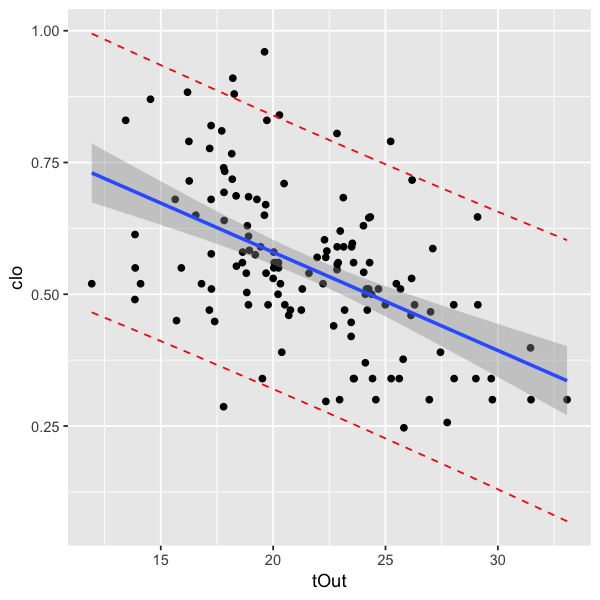

In [98]:
fit_tOut1 <- lm(clo ~ tOut, data = HE)
pred_tOut1 <- predict(fit_tOut1, interval = "prediction")
mydata_tOut1 <- cbind(HE, pred_tOut1)
p_tOut1 <- ggplot(mydata_tOut1, aes(tOut, clo)) + geom_point() + stat_smooth(method = lm)
p_tOut1 + geom_line(aes(y = lwr), color = "red", linetype = "dashed") + geom_line(aes(y = upr), color = "red", linetype = "dashed")

### 2. clo ~ tInOp: Male

Warning message in predict.lm(fit_tInOp1, interval = "prediction"):
“predictions on current data refer to _future_ responses
”

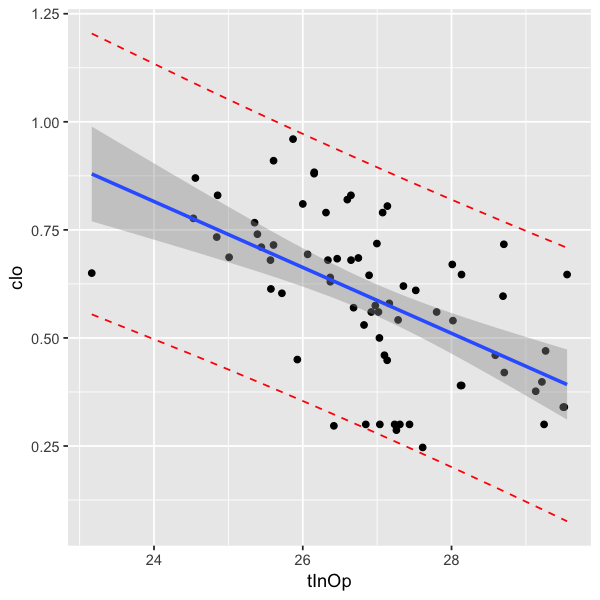

In [99]:
fit_tInOp1 <- lm(clo ~ tInOp, data = data_f)
pred_tInOp1 <- predict(fit_tInOp1, interval = "prediction")
mydata_tInOp1 <- cbind(data_f, pred_tInOp1)
p_tInOp1 <- ggplot(mydata_tInOp1, aes(tInOp, clo)) + geom_point() + stat_smooth(method = lm)
p_tInOp1 + geom_line(aes(y = lwr), color = "red", linetype = "dashed") + geom_line(aes(y = upr), color = "red", linetype = "dashed")

### 3. clo ~ tInOp: Female

Warning message in predict.lm(fit_tInOp2, interval = "prediction"):
“predictions on current data refer to _future_ responses
”

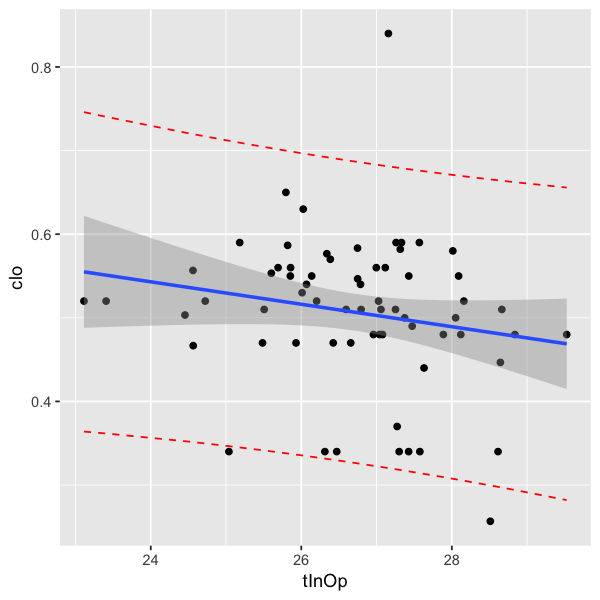

In [100]:
fit_tInOp2 <- lm(clo ~ tInOp, data = data_m)
pred_tInOp2 <- predict(fit_tInOp2, interval = "prediction")
mydata_tInOp2 <- cbind(data_m, pred_tInOp2)
p_tInOp2 <- ggplot(mydata_tInOp2, aes(tInOp, clo)) + geom_point() + stat_smooth(method = lm)
p_tInOp2 + geom_line(aes(y = lwr), color = "red", linetype = "dashed") + geom_line(aes(y = upr), color = "red", linetype = "dashed")

### Check based on residuals if subjectId can be ignored

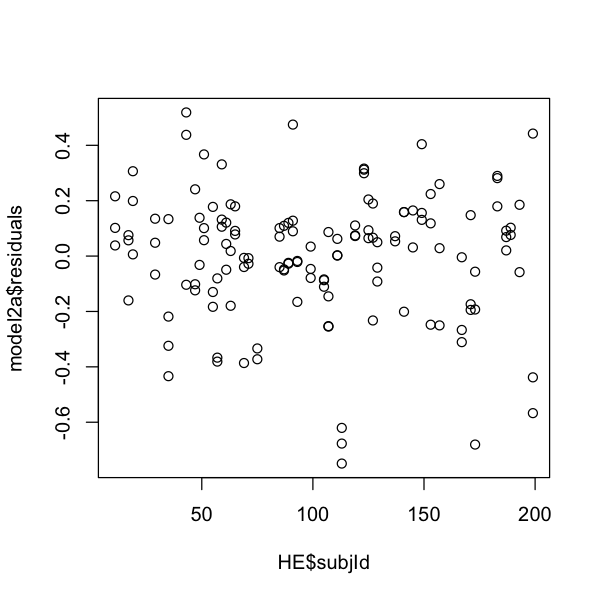

In [142]:
plot(HE$subjId,model2a$residuals)

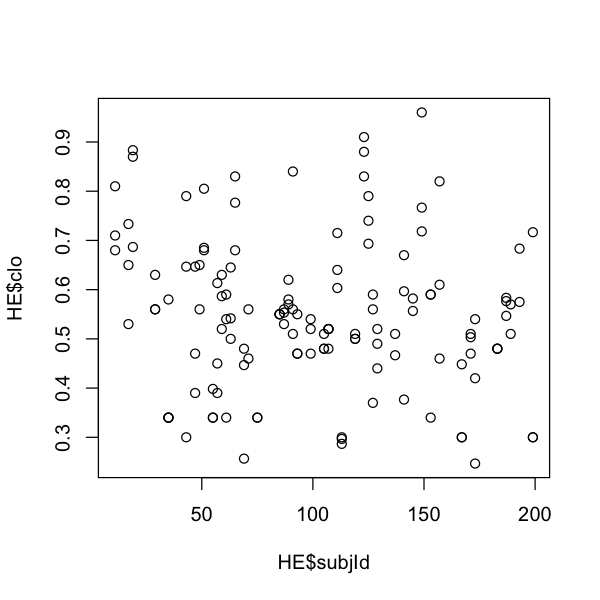

In [30]:
plot(HE$subjId,HE$clo)

By plotting the residuals based on the subject ID, we may see that there is a high variation between subject IDs. Further on, the level of clothing varies a lot based on the subject ID. Thus, it is important to include it as well in the model.

### Problem 2: Including subject Id

On each subject ID the outdoor temperature and level of clothing play a significant role (e.g even though subject ID 11 or 51 is defined by having a high level of clothing, that number is proportional to the outdoor temperature than is 19.15 C; on the other hand, due to the high outdoor temperature, the subject ID 55 has a low level of clothing).

In [144]:
cbind(with(HE, aggregate(tOut ~ subjId, FUN = "mean")),with(HE, aggregate(clo ~ subjId, FUN = "mean")))

subjId,tOut,subjId,clo
11,19.15951,11,0.7333333
17,20.18804,17,0.6377778
19,16.36067,19,0.8133333
29,22.84365,29,0.5833333
35,21.74722,35,0.4000000
43,28.60078,43,0.5788889
47,24.34119,47,0.5022222
49,19.12215,49,0.6050000
51,19.66243,51,0.7233333
55,29.50992,55,0.3594444


In [148]:
model_3<-lm(clo ~ sex*tOut*tInOp*subjId
                + I((tInOp - mean(I(tInOp)))^2) + I((tOut - mean(I(tOut)))^2), 
           data = HE)
summary(model_3)


Call:
lm(formula = clo ~ sex * tOut * tInOp * subjId + I((tInOp - mean(I(tInOp)))^2) + 
    I((tOut - mean(I(tOut)))^2), data = HE)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.306105 -0.056415 -0.002059  0.046318  0.308334 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)   
(Intercept)                    0.0647391  3.0652315   0.021  0.98319   
sexmale                        0.6925263  6.4393157   0.108  0.91454   
tOut                           0.0906539  0.1456882   0.622  0.53498   
tInOp                          0.0229351  0.1139290   0.201  0.84080   
subjId                         0.1029498  0.0365486   2.817  0.00569 **
I((tInOp - mean(I(tInOp)))^2) -0.0041583  0.0066229  -0.628  0.53130   
I((tOut - mean(I(tOut)))^2)   -0.0013048  0.0006093  -2.141  0.03430 * 
sexmale:tOut                  -0.0242128  0.2821324  -0.086  0.93175   
sexmale:tInOp                 -0.0176151  0.2411087  -0.073  0.94188   
tOut:tInOp        

#### Perform the incremental model reduction

In [202]:
## Type III table
M0 <- lm(clo ~ sex*tOut*tInOp*subjId, data = HE)
X0 <- model.matrix(M0)
m0 <- dim(X0)[2]
n <- dim(X0)[1]

In [203]:
## Projection matrices
H0 <- X0%*%solve(t(X0)%*%X0)%*%t(X0)
X1 <- X0[ ,-16]
H1 <- X1%*%solve(t(X1)%*%X1)%*%t(X1)
X2 <- X0[ ,-15]
H2 <- X2%*%solve(t(X2)%*%X2)%*%t(X2)
X3 <- X0[ ,-14]
H3 <- X3%*%solve(t(X3)%*%X3)%*%t(X3)
X4 <- X0[ ,-13]
H4 <- X4%*%solve(t(X4)%*%X4)%*%t(X4)
X5 <- X0[ ,-12]
H5 <- X5%*%solve(t(X5)%*%X5)%*%t(X5)
X6 <- X0[ ,-11]
H6 <- X6%*%solve(t(X6)%*%X6)%*%t(X6)
X7 <- X0[ ,-10]
H7 <- X7%*%solve(t(X7)%*%X7)%*%t(X7)
X8 <- X0[ ,-9]
H8 <- X8%*%solve(t(X8)%*%X8)%*%t(X8)
X9 <- X0[ ,-8]
H9 <- X9%*%solve(t(X9)%*%X9)%*%t(X9)
X10 <- X0[ ,-7]
H10 <- X10%*%solve(t(X10)%*%X10)%*%t(X10)
X11 <- X0[ ,-6]
H11 <- X11%*%solve(t(X11)%*%X11)%*%t(X11)
X12 <- X0[ ,-5]
H12 <- X12%*%solve(t(X12)%*%X12)%*%t(X12)
X13 <- X0[ ,-4]
H13 <- X13%*%solve(t(X13)%*%X13)%*%t(X13)
X14 <- X0[ ,-3]
H14 <- X14%*%solve(t(X14)%*%X14)%*%t(X14)
X15 <- X0[ ,-2]
H15 <- X15%*%solve(t(X15)%*%X15)%*%t(X15)
X16 <- X0[ ,-1]
H16 <- X16%*%solve(t(X16)%*%X16)%*%t(X16)

In [205]:
## Deviance (RSS partionioning)
y <- clo
D0 <- t(y)%*%(diag(136)-H0)%*%y
D1 <- t(y)%*%(H0-H1)%*%y
D2 <- t(y)%*%(H0-H2)%*%y
D3 <- t(y)%*%(H0-H3)%*%y
D4 <- t(y)%*%(H0-H4)%*%y
D5 <- t(y)%*%(H0-H5)%*%y
D6 <- t(y)%*%(H0-H6)%*%y
D7 <- t(y)%*%(H0-H7)%*%y
D8 <- t(y)%*%(H0-H8)%*%y
D9 <- t(y)%*%(H0-H9)%*%y
D10 <- t(y)%*%(H0-H10)%*%y
D11 <- t(y)%*%(H0-H11)%*%y
D12 <- t(y)%*%(H0-H12)%*%y
D13 <- t(y)%*%(H0-H13)%*%y
D14 <- t(y)%*%(H0-H14)%*%y
D15 <- t(y)%*%(H0-H15)%*%y
D16 <- t(y)%*%(H0-H16)%*%y
D <- c(D16,D15,D14,D13,D12,D11,D10,D9,D8,D7,D6,D5,D4,D3,D2,D1,D0)

In [206]:
Df <- c(rep(1,16),n-m0)
F <- c(D16,D15,D14,D13,D12,D11,D10,D9,D8,D7,D6,D5,D4,D3,D2,D1,D0)/(D0/(n-m0))
pv <- 1-pf(F,df1=1,df2=n-m0)

Warning message in c(D16, D15, D14, D13, D12, D11, D10, D9, D8, D7, D6, D5, D4, :
“Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
”

In [208]:
Anova(M0,type="III")

,Sum Sq,Df,F value,Pr(>F)
(Intercept),0.018194935,1,1.3952054,0.239863715
sex,0.007210721,1,0.5529252,0.458578363
tOut,0.053510055,1,4.1032034,0.045020195
tInOp,0.026458527,1,2.0288658,0.156931108
subjId,0.108987943,1,8.3573021,0.004561121
sex:tOut,0.009397407,1,0.7206023,0.397636644
sex:tInOp,0.006278796,1,0.4814642,0.489100865
tOut:tInOp,0.055188965,1,4.2319439,0.041836960
sex:subjId,0.059799150,1,4.5854573,0.034266347
tOut:subjId,0.112615531,1,8.6354691,0.003954851


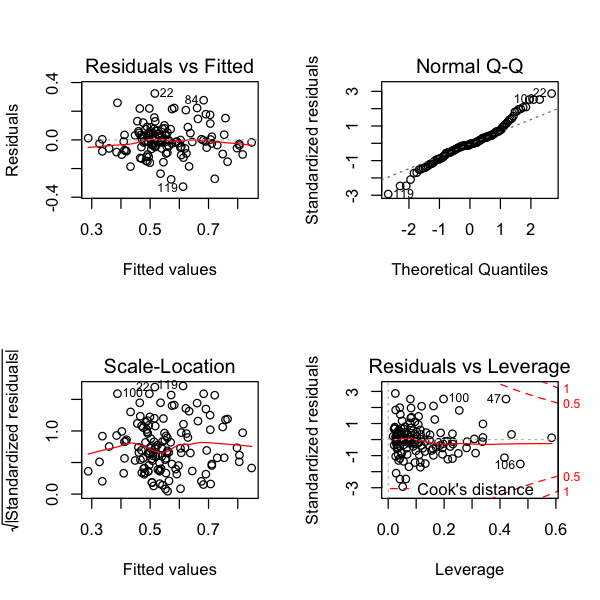

In [210]:
par(mfrow=c(2,2))
plot(M0)

### Visualizations

Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”

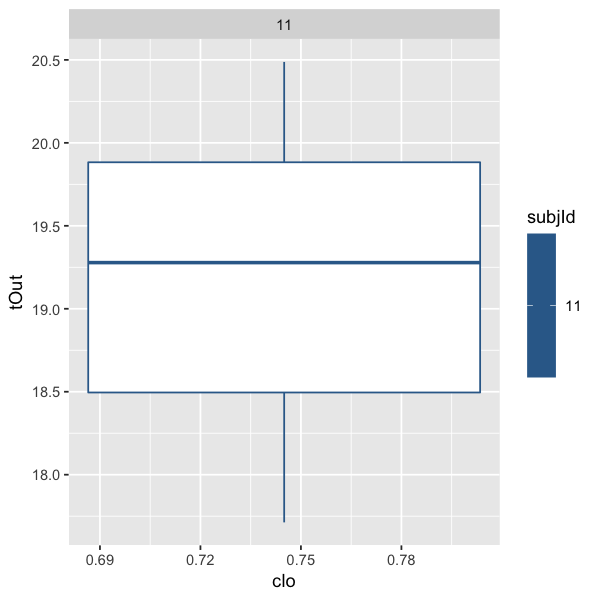

In [33]:
qplot(clo, tOut, facets = . ~ subjId, colour = subjId, geom = "boxplot", data = subset(HE,subjId==c(11))) 

### Add subjectID in the model or use model comparison

In [35]:
rs_subj_tInOp_tOut_ml = lmer(clo ~ tInOp + tOut + (1 | subjId), REML = FALSE, data = HE)
rs_subj_tOut_ml = lmer(clo ~ 1 + tOut + (1 | subjId), REML = FALSE, data = HE)
anova(rs_subj_tInOp_tOut_ml, rs_subj_tOut_ml)

rs_subj_tInOp_ml = lmer(clo ~ 1 + tInOp + (1 | subjId), REML = FALSE, data = HE)
anova(rs_subj_tInOp_tOut_ml, rs_subj_tInOp_ml)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
rs_subj_tOut_ml,4,-196.0159,-184.3653,102.0080,-204.0159,NA,NA,NA
rs_subj_tInOp_tOut_ml,5,-194.8316,-180.2683,102.4158,-204.8316,0.8156691,1,0.3664495


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
rs_subj_tInOp_ml,4,-169.9365,-158.2859,88.96824,-177.9365,NA,NA,NA
rs_subj_tInOp_tOut_ml,5,-194.8316,-180.2683,102.41581,-204.8316,26.89514,1,2.147981e-07


In [36]:
anova(rs_subj_tOut_ml)

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
tOut,0.328498,0.328498,1,133.8921,40.88667,2.485318e-09


### Problem C: The full data-set

In [21]:
HE_full <- read.table("clothingFull.csv", sep=",", header=TRUE, as.is=TRUE)

In [71]:
summary(HE_full)
head(HE_full)

       X              clo              tOut            tInOp      
 Min.   :  1.0   Min.   :0.2300   Min.   : 9.337   Min.   :22.29  
 1st Qu.:201.5   1st Qu.:0.4700   1st Qu.:18.067   1st Qu.:25.47  
 Median :402.0   Median :0.5400   Median :21.226   Median :26.85  
 Mean   :402.0   Mean   :0.5515   Mean   :21.548   Mean   :26.83  
 3rd Qu.:602.5   3rd Qu.:0.6400   3rd Qu.:24.790   3rd Qu.:28.04  
 Max.   :803.0   Max.   :0.9700   Max.   :36.234   Max.   :32.20  
     sex                subjId           day            obs.no     
 Length:803         Min.   : 11.0   Min.   :1.000   Min.   :1.000  
 Class :character   1st Qu.: 59.0   1st Qu.:1.000   1st Qu.:2.000  
 Mode  :character   Median : 99.0   Median :2.000   Median :3.000  
                    Mean   :101.2   Mean   :1.971   Mean   :3.471  
                    3rd Qu.:141.0   3rd Qu.:3.000   3rd Qu.:5.000  
                    Max.   :199.0   Max.   :4.000   Max.   :6.000  

X,clo,tOut,tInOp,sex,subjId,day,obs.no
1,0.71,17.26720,22.28525,female,11,1,1
2,0.71,20.70000,24.57230,female,11,1,2
3,0.71,20.54773,25.55077,female,11,1,3
4,0.71,21.90000,26.40069,female,11,1,4
5,0.71,21.52080,26.66522,female,11,1,5
6,0.71,20.99017,27.18361,female,11,1,6


In [ ]:
# Add parameters to mixed linear model in increaments to find which ones give significance to the fit.
# We will keep subjId as a random intercet since this does not seem to be an independent parameter. Unclear to me 
# if day should be treated the same way. 

In [33]:
mlma = lmer(clo ~ tOut + (1 | subjId), REML = FALSE, data = HE_full)
mlmb = lmer(clo ~ tInOp + tOut + day + sex + ( 1 | subjId), REML = FALSE, data = HE_full)
anova(mlma, mlmb)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
mlma,4,-1376.296,-1357.543,692.1481,-1384.296,NA,NA,NA
mlmb,7,-1385.219,-1352.401,699.6097,-1399.219,14.92329,3,0.00188339


In [ ]:
# It seems that adding tOut + day + sex gives significance, will try obs.no.

In [34]:
mlmc = lmer(clo ~ tInOp + tOut + day + sex +  obs.no + (1 | subjId), REML = FALSE, data = HE_full)
anova(mlmb, mlmc)


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
mlmb,7,-1385.219,-1352.401,699.6097,-1399.219,NA,NA,NA
mlmc,8,-1390.960,-1353.454,703.4802,-1406.960,7.740922,1,0.005398322


In [ ]:
# The obs.no is significant for the fit as well. 

In [ ]:
rs_subj_no_day_ml = lmer(clo ~ tInOp + tOut + (1 | subjId) + (1 | obs.no), REML = FALSE, data = HE_full)
anova(rs_subj_all_ml, rs_subj_no_day_ml)

In [ ]:
rs_subj_no_subjectId_ml = lmer(clo ~ tInOp + tOut + (1 | day) + (1 | obs.no), REML = FALSE, data = HE_full)
anova(rs_subj_all_ml, rs_subj_no_subjectId_ml)

### Model validation

### Check the linear and log scale (for diminushing the effect of biased datapoints)

In [36]:
model0_full <- lm(clo ~ tInOp*tOut*subjId*day*obs.no, data = HE_full)
summary(model0_full)

par(mfrow=c(2,2))
plot(model1_update_1)


Call:
lm(formula = clo ~ tInOp * tOut * subjId * day * obs.no, data = HE_full)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35419 -0.08463 -0.00979  0.06697  0.41707 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)
(Intercept)                   4.288e-01  4.300e+00   0.100    0.921
tInOp                         1.488e-02  1.683e-01   0.088    0.930
tOut                          9.518e-02  2.163e-01   0.440    0.660
subjId                        1.566e-02  4.613e-02   0.340    0.734
day                           8.137e-01  2.145e+00   0.379    0.704
obs.no                       -1.083e-01  9.718e-01  -0.111    0.911
tInOp:tOut                   -4.462e-03  8.302e-03  -0.537    0.591
tInOp:subjId                 -6.910e-04  1.787e-03  -0.387    0.699
tOut:subjId                  -1.103e-03  2.250e-03  -0.490    0.624
tInOp:day                    -2.960e-02  8.375e-02  -0.353    0.724
tOut:day                     -7.252e-02  1.012e-01  -

ERROR: Error in plot(model1_update_1): object 'model1_update_1' not found



Call:
lm(formula = log(clo) ~ tInOp * tOut * subjId * day * obs.no, 
    data = HE_full)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79034 -0.14761  0.00777  0.15016  0.70123 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)
(Intercept)                  -1.445e+00  7.868e+00  -0.184    0.854
tInOp                         5.580e-02  3.080e-01   0.181    0.856
tOut                          2.209e-01  3.957e-01   0.558    0.577
subjId                        1.779e-02  8.441e-02   0.211    0.833
day                           1.478e+00  3.925e+00   0.377    0.707
obs.no                       -4.387e-01  1.778e+00  -0.247    0.805
tInOp:tOut                   -1.029e-02  1.519e-02  -0.677    0.498
tInOp:subjId                 -8.573e-04  3.269e-03  -0.262    0.793
tOut:subjId                  -1.796e-03  4.118e-03  -0.436    0.663
tInOp:day                    -5.669e-02  1.532e-01  -0.370    0.712
tOut:day                     -1.342e-01  1.

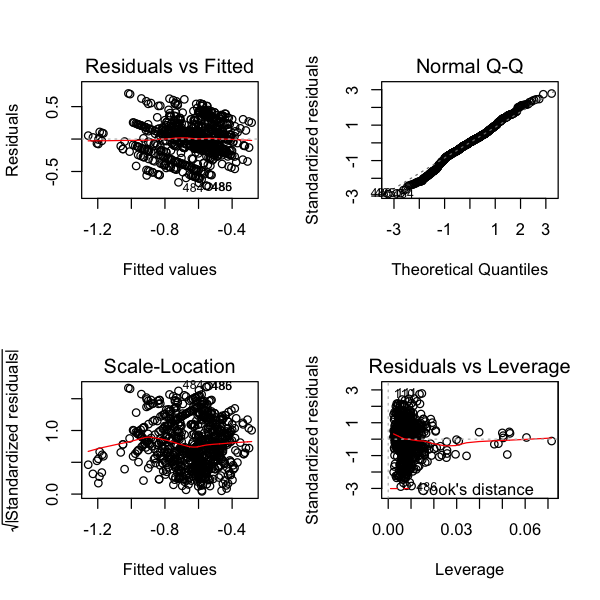

In [218]:
model1_full <- lm(log(clo) ~ tInOp*tOut*subjId*day*obs.no, data = HE_full)
summary(model1_full)

par(mfrow=c(2,2))
plot(model1_update_1)

In [ ]:
#### Remark: Residuals are identically, independent and normally distributed around mean 0 and variance sigma. Based on the QQ-plot, the residuals cover most of the variace in the model. By plotting the fitted value vs residuals, we notice the scaterred patern for residuals.

#### Perform the incremental model reduction
Reduce the parameters of the linear model by dropping parameters one by one. 

In [37]:
drop1(model0_full, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.36124,-3167.129,NA,NA
tInOp:tOut:subjId:day:obs.no,1,0.001723522,14.36296,-3169.032,0.0925293,0.7610681


In [38]:
model1_full = update(model0_full,~. -tInOp:tOut:subjId:day:obs.no)
summary(model1_full)
drop1(model1_full, test="F")


Call:
lm(formula = clo ~ tInOp + tOut + subjId + day + obs.no + tInOp:tOut + 
    tInOp:subjId + tOut:subjId + tInOp:day + tOut:day + subjId:day + 
    tInOp:obs.no + tOut:obs.no + subjId:obs.no + day:obs.no + 
    tInOp:tOut:subjId + tInOp:tOut:day + tInOp:subjId:day + tOut:subjId:day + 
    tInOp:tOut:obs.no + tInOp:subjId:obs.no + tOut:subjId:obs.no + 
    tInOp:day:obs.no + tOut:day:obs.no + subjId:day:obs.no + 
    tInOp:tOut:subjId:day + tInOp:tOut:subjId:obs.no + tInOp:tOut:day:obs.no + 
    tInOp:subjId:day:obs.no + tOut:subjId:day:obs.no, data = HE_full)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35399 -0.08407 -0.01016  0.06703  0.41656 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)
(Intercept)               1.358e+00  3.023e+00   0.449    0.653
tInOp                    -2.064e-02  1.211e-01  -0.170    0.865
tOut                      4.931e-02  1.549e-01   0.318    0.750
subjId                    4.006e-03  2.567e-02   0.156

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.36296,-3169.032,NA,NA
tInOp:tOut:subjId:day,1,0.0200120942,14.38298,-3169.914,1.075637034,0.3000004
tInOp:tOut:subjId:obs.no,1,0.0133743197,14.37634,-3170.285,0.718860978,0.3967806
tInOp:tOut:day:obs.no,1,0.0001035876,14.36307,-3171.027,0.005567765,0.9405384
tInOp:subjId:day:obs.no,1,0.0001909641,14.36316,-3171.022,0.010264195,0.9193288
tOut:subjId:day:obs.no,1,0.0050748197,14.36804,-3170.749,0.272768257,0.6016306


In [39]:
model2_full = update(model1_full,~. -tInOp:tOut:day:obs.no)
summary(model2_full)
drop1(model2_full, test="F")


Call:
lm(formula = clo ~ tInOp + tOut + subjId + day + obs.no + tInOp:tOut + 
    tInOp:subjId + tOut:subjId + tInOp:day + tOut:day + subjId:day + 
    tInOp:obs.no + tOut:obs.no + subjId:obs.no + day:obs.no + 
    tInOp:tOut:subjId + tInOp:tOut:day + tInOp:subjId:day + tOut:subjId:day + 
    tInOp:tOut:obs.no + tInOp:subjId:obs.no + tOut:subjId:obs.no + 
    tInOp:day:obs.no + tOut:day:obs.no + subjId:day:obs.no + 
    tInOp:tOut:subjId:day + tInOp:tOut:subjId:obs.no + tInOp:subjId:day:obs.no + 
    tOut:subjId:day:obs.no, data = HE_full)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35388 -0.08429 -0.01012  0.06689  0.41656 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)
(Intercept)               1.222e+00  2.408e+00   0.508    0.612
tInOp                    -1.539e-02  9.847e-02  -0.156    0.876
tOut                      5.639e-02  1.225e-01   0.460    0.645
subjId                    3.959e-03  2.565e-02   0.154    0.877
day           

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.36307,-3171.027,NA,NA
tInOp:tOut:subjId:day,1,0.0201637537,14.38323,-3171.900,1.08518468,0.2978663
tInOp:tOut:subjId:obs.no,1,0.0134376376,14.37651,-3172.276,0.72319463,0.3953613
tInOp:subjId:day:obs.no,1,0.0002148471,14.36328,-3173.015,0.01156277,0.9143962
tOut:subjId:day:obs.no,1,0.0051066079,14.36817,-3172.741,0.27483041,0.6002600


In [42]:
model3_full = update(model2_full,~. -tInOp:subjId:day:obs.no)
summary(model3_full)
drop1(model3_full, test="F")


Call:
lm(formula = clo ~ tInOp + tOut + subjId + day + obs.no + tInOp:tOut + 
    tInOp:subjId + tOut:subjId + tInOp:day + tOut:day + subjId:day + 
    tInOp:obs.no + tOut:obs.no + subjId:obs.no + day:obs.no + 
    tInOp:tOut:subjId + tInOp:tOut:day + tInOp:subjId:day + tOut:subjId:day + 
    tInOp:tOut:obs.no + tInOp:subjId:obs.no + tOut:subjId:obs.no + 
    tInOp:day:obs.no + tOut:day:obs.no + subjId:day:obs.no + 
    tInOp:tOut:subjId:day + tInOp:tOut:subjId:obs.no + tOut:subjId:day:obs.no, 
    data = HE_full)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35400 -0.08420 -0.01021  0.06756  0.41669 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)  
(Intercept)               1.214e+00  2.405e+00   0.505   0.6138  
tInOp                    -1.458e-02  9.812e-02  -0.149   0.8819  
tOut                      5.252e-02  1.170e-01   0.449   0.6537  
subjId                    3.980e-03  2.563e-02   0.155   0.8766  
day                       4.05

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.36328,-3173.015,NA,NA
tInOp:day:obs.no,1,0.073517943,14.43680,-3170.915,3.9616909,0.04689824
tInOp:tOut:subjId:day,1,0.020239314,14.38352,-3173.884,1.0906440,0.29665461
tInOp:tOut:subjId:obs.no,1,0.014939255,14.37822,-3174.180,0.8050376,0.36987045
tOut:subjId:day:obs.no,1,0.006604128,14.36989,-3174.646,0.3558793,0.55097815


In [43]:
model4_full = update(model3_full,~. -tOut:subjId:day:obs.no)
summary(model4_full)
drop1(model4_full, test="F")


Call:
lm(formula = clo ~ tInOp + tOut + subjId + day + obs.no + tInOp:tOut + 
    tInOp:subjId + tOut:subjId + tInOp:day + tOut:day + subjId:day + 
    tInOp:obs.no + tOut:obs.no + subjId:obs.no + day:obs.no + 
    tInOp:tOut:subjId + tInOp:tOut:day + tInOp:subjId:day + tOut:subjId:day + 
    tInOp:tOut:obs.no + tInOp:subjId:obs.no + tOut:subjId:obs.no + 
    tInOp:day:obs.no + tOut:day:obs.no + subjId:day:obs.no + 
    tInOp:tOut:subjId:day + tInOp:tOut:subjId:obs.no, data = HE_full)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35448 -0.08495 -0.00954  0.06580  0.41689 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)   
(Intercept)               1.779e+00  2.210e+00   0.805  0.42119   
tInOp                    -4.229e-02  8.639e-02  -0.490  0.62461   
tOut                      2.694e-02  1.088e-01   0.248  0.80456   
subjId                   -2.117e-03  2.349e-02  -0.090  0.92821   
day                       1.662e-01  8.495e-01   0.196 

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.36989,-3174.646,NA,NA
tInOp:day:obs.no,1,0.07967622,14.44956,-3172.205,4.2971157,0.038507034
tOut:day:obs.no,1,0.01304628,14.38293,-3175.917,0.7036151,0.401830288
subjId:day:obs.no,1,0.13366426,14.50355,-3169.211,7.2088110,0.007409699
tInOp:tOut:subjId:day,1,0.01363838,14.38353,-3175.884,0.7355482,0.391355828
tInOp:tOut:subjId:obs.no,1,0.01645588,14.38634,-3175.727,0.8875022,0.346448650


In [44]:
model5_full = update(model4_full,~. -tOut:day:obs.no)
summary(model5_full)
drop1(model5_full, test="F")


Call:
lm(formula = clo ~ tInOp + tOut + subjId + day + obs.no + tInOp:tOut + 
    tInOp:subjId + tOut:subjId + tInOp:day + tOut:day + subjId:day + 
    tInOp:obs.no + tOut:obs.no + subjId:obs.no + day:obs.no + 
    tInOp:tOut:subjId + tInOp:tOut:day + tInOp:subjId:day + tOut:subjId:day + 
    tInOp:tOut:obs.no + tInOp:subjId:obs.no + tOut:subjId:obs.no + 
    tInOp:day:obs.no + subjId:day:obs.no + tInOp:tOut:subjId:day + 
    tInOp:tOut:subjId:obs.no, data = HE_full)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35524 -0.08498 -0.01130  0.06528  0.41650 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)   
(Intercept)               1.485e+00  2.182e+00   0.681  0.49638   
tInOp                    -2.599e-02  8.416e-02  -0.309  0.75753   
tOut                      3.507e-02  1.084e-01   0.324  0.74633   
subjId                   -3.060e-03  2.346e-02  -0.130  0.89627   
day                       3.029e-01  8.335e-01   0.363  0.71643   
obs.no

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.38293,-3175.917,NA,NA
tInOp:day:obs.no,1,0.06669930,14.44963,-3174.202,3.5986164,0.058198725
subjId:day:obs.no,1,0.15482589,14.53776,-3169.319,8.3532954,0.003957292
tInOp:tOut:subjId:day,1,0.01242413,14.39536,-3177.224,0.6703171,0.413192429
tInOp:tOut:subjId:obs.no,1,0.01674636,14.39968,-3176.982,0.9035133,0.342137348


In [45]:
model6_full = update(model5_full,~. -tInOp:tOut:subjId:day)
summary(model6_full)
drop1(model6_full, test="F")


Call:
lm(formula = clo ~ tInOp + tOut + subjId + day + obs.no + tInOp:tOut + 
    tInOp:subjId + tOut:subjId + tInOp:day + tOut:day + subjId:day + 
    tInOp:obs.no + tOut:obs.no + subjId:obs.no + day:obs.no + 
    tInOp:tOut:subjId + tInOp:tOut:day + tInOp:subjId:day + tOut:subjId:day + 
    tInOp:tOut:obs.no + tInOp:subjId:obs.no + tOut:subjId:obs.no + 
    tInOp:day:obs.no + subjId:day:obs.no + tInOp:tOut:subjId:obs.no, 
    data = HE_full)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35470 -0.08581 -0.01091  0.06574  0.41765 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)   
(Intercept)               2.475e+00  1.816e+00   1.363  0.17320   
tInOp                    -6.252e-02  7.135e-02  -0.876  0.38120   
tOut                     -1.060e-02  9.291e-02  -0.114  0.90919   
subjId                   -1.618e-02  1.713e-02  -0.945  0.34516   
day                      -2.747e-01  4.438e-01  -0.619  0.53607   
obs.no                   -2.85

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.39536,-3177.224,NA,NA
tInOp:tOut:day,1,0.02244652,14.41780,-3177.972,1.2115674,0.271362809
tInOp:subjId:day,1,0.01047235,14.40583,-3178.640,0.5652526,0.452379273
tOut:subjId:day,1,0.10417525,14.49953,-3173.433,5.6229357,0.017969855
tInOp:day:obs.no,1,0.07317655,14.46853,-3175.152,3.9497580,0.047228779
subjId:day:obs.no,1,0.15945907,14.55482,-3170.377,8.6069202,0.003447453
tInOp:tOut:subjId:obs.no,1,0.01696492,14.41232,-3178.278,0.9156939,0.338905793


In [46]:
model7_full = update(model6_full,~. -tInOp:subjId:day)
summary(model7_full)
drop1(model7_full, test="F")


Call:
lm(formula = clo ~ tInOp + tOut + subjId + day + obs.no + tInOp:tOut + 
    tInOp:subjId + tOut:subjId + tInOp:day + tOut:day + subjId:day + 
    tInOp:obs.no + tOut:obs.no + subjId:obs.no + day:obs.no + 
    tInOp:tOut:subjId + tInOp:tOut:day + tOut:subjId:day + tInOp:tOut:obs.no + 
    tInOp:subjId:obs.no + tOut:subjId:obs.no + tInOp:day:obs.no + 
    subjId:day:obs.no + tInOp:tOut:subjId:obs.no, data = HE_full)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35519 -0.08639 -0.01174  0.06565  0.41618 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)   
(Intercept)               2.444e+00  1.815e+00   1.347  0.17843   
tInOp                    -5.958e-02  7.122e-02  -0.837  0.40309   
tOut                     -2.465e-02  9.098e-02  -0.271  0.78650   
subjId                   -1.508e-02  1.706e-02  -0.884  0.37704   
day                      -1.460e-01  4.093e-01  -0.357  0.72146   
obs.no                   -2.953e-01  3.900e-01  -0.757

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.40583,-3178.640,NA,NA
tInOp:tOut:day,1,0.02098924,14.42682,-3179.470,1.133543,0.287351192
tOut:subjId:day,1,0.17101015,14.57684,-3171.163,9.235559,0.002453059
tInOp:day:obs.no,1,0.06938993,14.47522,-3176.781,3.747467,0.053249577
subjId:day:obs.no,1,0.16109789,14.56693,-3171.710,8.700239,0.003277085
tInOp:tOut:subjId:obs.no,1,0.01853851,14.42437,-3179.607,1.001189,0.317334049


In [47]:
model8_full = update(model7_full,~. -tInOp:tOut:subjId:obs.no)
summary(model8_full)
drop1(model8_full, test="F")


Call:
lm(formula = clo ~ tInOp + tOut + subjId + day + obs.no + tInOp:tOut + 
    tInOp:subjId + tOut:subjId + tInOp:day + tOut:day + subjId:day + 
    tInOp:obs.no + tOut:obs.no + subjId:obs.no + day:obs.no + 
    tInOp:tOut:subjId + tInOp:tOut:day + tOut:subjId:day + tInOp:tOut:obs.no + 
    tInOp:subjId:obs.no + tOut:subjId:obs.no + tInOp:day:obs.no + 
    subjId:day:obs.no, data = HE_full)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35484 -0.08607 -0.01015  0.06387  0.41695 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)   
(Intercept)          1.159e+00  1.282e+00   0.904  0.36629   
tInOp               -9.598e-03  5.077e-02  -0.189  0.85009   
tOut                 3.708e-02  6.687e-02   0.555  0.57932   
subjId              -2.684e-05  8.048e-03  -0.003  0.99734   
day                 -1.553e-01  4.092e-01  -0.380  0.70436   
obs.no               2.835e-02  2.179e-01   0.130  0.89653   
tInOp:tOut          -2.403e-03  2.524e-03  -0.952

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.42437,-3179.607,NA,NA
tInOp:tOut:subjId,1,0.015965972,14.44033,-3180.719,0.8622556,0.353395886
tInOp:tOut:day,1,0.022380747,14.44675,-3180.362,1.2086908,0.271931201
tOut:subjId:day,1,0.183171859,14.60754,-3171.474,9.8923483,0.001722714
tInOp:tOut:obs.no,1,0.002577157,14.42695,-3181.463,0.1391815,0.709197570
tInOp:subjId:obs.no,1,0.002703314,14.42707,-3181.456,0.1459947,0.702496930
tOut:subjId:obs.no,1,0.025191347,14.44956,-3180.206,1.3604796,0.243811336
tInOp:day:obs.no,1,0.075165645,14.49953,-3177.433,4.0593831,0.044269683
subjId:day:obs.no,1,0.161055372,14.58542,-3172.691,8.6979291,0.003281070


In [48]:
model9_full = update(model8_full,~. -tInOp:tOut:obs.no)
summary(model9_full)
drop1(model9_full, test="F")


Call:
lm(formula = clo ~ tInOp + tOut + subjId + day + obs.no + tInOp:tOut + 
    tInOp:subjId + tOut:subjId + tInOp:day + tOut:day + subjId:day + 
    tInOp:obs.no + tOut:obs.no + subjId:obs.no + day:obs.no + 
    tInOp:tOut:subjId + tInOp:tOut:day + tOut:subjId:day + tInOp:subjId:obs.no + 
    tOut:subjId:obs.no + tInOp:day:obs.no + subjId:day:obs.no, 
    data = HE_full)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35420 -0.08584 -0.01068  0.06508  0.41564 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)   
(Intercept)          1.450e+00  1.017e+00   1.426  0.15430   
tInOp               -2.097e-02  4.058e-02  -0.517  0.60550   
tOut                 2.112e-02  5.135e-02   0.411  0.68098   
subjId              -9.515e-05  8.042e-03  -0.012  0.99056   
day                 -1.534e-01  4.089e-01  -0.375  0.70769   
obs.no              -3.276e-02  1.437e-01  -0.228  0.81968   
tInOp:tOut          -1.788e-03  1.909e-03  -0.936  0.34936   
tInOp:s

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.42695,-3181.463,NA,NA
tInOp:tOut:subjId,1,0.015185347,14.44213,-3182.619,0.8210033,0.365166783
tInOp:tOut:day,1,0.020923639,14.44787,-3182.300,1.1312470,0.287838671
tOut:subjId:day,1,0.182463811,14.60941,-3173.371,9.8649968,0.001748102
tInOp:subjId:obs.no,1,0.003099646,14.43005,-3183.291,0.1675839,0.682380424
tOut:subjId:obs.no,1,0.024747564,14.45169,-3182.087,1.3379894,0.247742988
tInOp:day:obs.no,1,0.072589063,14.49953,-3179.433,3.9245638,0.047936349
subjId:day:obs.no,1,0.164783564,14.59173,-3174.344,8.9091054,0.002926174


In [49]:
model10_full = update(model9_full,~. -tInOp:subjId:obs.no)
summary(model10_full)
drop1(model10_full, test="F")


Call:
lm(formula = clo ~ tInOp + tOut + subjId + day + obs.no + tInOp:tOut + 
    tInOp:subjId + tOut:subjId + tInOp:day + tOut:day + subjId:day + 
    tInOp:obs.no + tOut:obs.no + subjId:obs.no + day:obs.no + 
    tInOp:tOut:subjId + tInOp:tOut:day + tOut:subjId:day + tOut:subjId:obs.no + 
    tInOp:day:obs.no + subjId:day:obs.no, data = HE_full)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35441 -0.08564 -0.01168  0.06552  0.41677 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)   
(Intercept)         1.517e+00  1.003e+00   1.513  0.13059   
tInOp              -2.462e-02  3.957e-02  -0.622  0.53406   
tOut                2.519e-02  5.035e-02   0.500  0.61706   
subjId             -8.420e-04  7.828e-03  -0.108  0.91436   
day                -1.412e-01  4.076e-01  -0.346  0.72910   
obs.no             -6.442e-02  1.210e-01  -0.532  0.59466   
tInOp:tOut         -1.894e-03  1.891e-03  -1.002  0.31686   
tInOp:subjId       -3.519e-05  3.161e-04  

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.43005,-3183.291,NA,NA
tInOp:tOut:subjId,1,0.01858128,14.44863,-3184.258,1.005678,0.316251117
tInOp:tOut:day,1,0.02193796,14.45198,-3184.071,1.187352,0.276200334
tOut:subjId:day,1,0.18516794,14.61521,-3175.052,10.021878,0.001606960
tOut:subjId:obs.no,1,0.02171609,14.45176,-3184.083,1.175344,0.278640495
tInOp:day:obs.no,1,0.07109299,14.50114,-3181.344,3.847779,0.050166776
subjId:day:obs.no,1,0.16394063,14.59399,-3176.219,8.872989,0.002983841


In [50]:
model11_full = update(model10_full,~. -tInOp:tOut:subjId)
summary(model11_full)
drop1(model11_full, test="F")


Call:
lm(formula = clo ~ tInOp + tOut + subjId + day + obs.no + tInOp:tOut + 
    tInOp:subjId + tOut:subjId + tInOp:day + tOut:day + subjId:day + 
    tInOp:obs.no + tOut:obs.no + subjId:obs.no + day:obs.no + 
    tInOp:tOut:day + tOut:subjId:day + tOut:subjId:obs.no + tInOp:day:obs.no + 
    subjId:day:obs.no, data = HE_full)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35395 -0.08722 -0.01186  0.06434  0.41702 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         2.072e+00  8.362e-01   2.478 0.013430 *  
tInOp              -4.768e-02  3.219e-02  -1.481 0.138986    
tOut                1.788e-04  4.374e-02   0.004 0.996741    
subjId             -8.391e-03  2.147e-03  -3.908 0.000101 ***
day                -9.710e-02  4.053e-01  -0.240 0.810710    
obs.no             -5.062e-02  1.202e-01  -0.421 0.673835    
tInOp:tOut         -8.557e-04  1.582e-03  -0.541 0.588777    
tInOp:subjId        2.730e-04  7.410e-05   3.684 0.000

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.44863,-3184.258,NA,NA
tInOp:subjId,1,0.250717031,14.69934,-3172.443,13.5695055,0.0002457213
tInOp:tOut:day,1,0.024880513,14.47351,-3184.876,1.3466028,0.2462270358
tOut:subjId:day,1,0.182934963,14.63156,-3176.155,9.9009508,0.0017145381
tOut:subjId:obs.no,1,0.006698074,14.45532,-3185.885,0.3625185,0.5472853839
tInOp:day:obs.no,1,0.070377338,14.51900,-3182.356,3.8090180,0.0513339621
subjId:day:obs.no,1,0.159116155,14.60774,-3177.463,8.6118104,0.0034376774


In [51]:
model12_full = update(model11_full,~. -tOut:subjId:obs.no)
summary(model12_full)
drop1(model12_full, test="F")


Call:
lm(formula = clo ~ tInOp + tOut + subjId + day + obs.no + tInOp:tOut + 
    tInOp:subjId + tOut:subjId + tInOp:day + tOut:day + subjId:day + 
    tInOp:obs.no + tOut:obs.no + subjId:obs.no + day:obs.no + 
    tInOp:tOut:day + tOut:subjId:day + tInOp:day:obs.no + subjId:day:obs.no, 
    data = HE_full)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35338 -0.08645 -0.01353  0.06459  0.41313 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.053e+00  8.352e-01   2.458  0.01420 *  
tInOp             -4.881e-02  3.213e-02  -1.519  0.12914    
tOut               1.763e-03  4.365e-02   0.040  0.96779    
subjId            -7.838e-03  1.940e-03  -4.041 5.86e-05 ***
day               -1.025e-01  4.050e-01  -0.253  0.80024    
obs.no            -4.103e-02  1.191e-01  -0.344  0.73064    
tInOp:tOut        -8.179e-04  1.580e-03  -0.518  0.60492    
tInOp:subjId       2.707e-04  7.398e-05   3.659  0.00027 ***
tOut:subjId        1.1

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.45532,-3185.885,NA,NA
tInOp:subjId,1,0.24718275,14.70251,-3174.270,13.389121,0.0002700512
tOut:obs.no,1,0.02185002,14.47717,-3186.673,1.183548,0.2769697079
tInOp:tOut:day,1,0.02509096,14.48042,-3186.493,1.359099,0.2440486499
tOut:subjId:day,1,0.18601852,14.64134,-3177.618,10.076045,0.0015608363
tInOp:day:obs.no,1,0.07263165,14.52796,-3183.861,3.934231,0.0476616795
subjId:day:obs.no,1,0.15314636,14.60847,-3179.423,8.295462,0.0040829215


In [52]:
model13_full = update(model12_full,~. -tOut:obs.no)
summary(model13_full)
drop1(model13_full, test="F")


Call:
lm(formula = clo ~ tInOp + tOut + subjId + day + obs.no + tInOp:tOut + 
    tInOp:subjId + tOut:subjId + tInOp:day + tOut:day + subjId:day + 
    tInOp:obs.no + subjId:obs.no + day:obs.no + tInOp:tOut:day + 
    tOut:subjId:day + tInOp:day:obs.no + subjId:day:obs.no, data = HE_full)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35372 -0.08873 -0.01141  0.06491  0.41056 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.198e+00  8.246e-01   2.665 0.007855 ** 
tInOp             -5.607e-02  3.143e-02  -1.784 0.074837 .  
tOut              -6.244e-03  4.303e-02  -0.145 0.884651    
subjId            -7.663e-03  1.933e-03  -3.964 8.05e-05 ***
day               -7.941e-02  4.045e-01  -0.196 0.844412    
obs.no            -2.650e-02  1.184e-01  -0.224 0.822918    
tInOp:tOut        -4.187e-04  1.537e-03  -0.272 0.785421    
tInOp:subjId       2.609e-04  7.344e-05   3.553 0.000404 ***
tOut:subjId        1.181e-04  6.023e-05  

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.47717,-3186.673,NA,NA
tInOp:subjId,1,0.23307838,14.71025,-3175.847,12.622176,0.0004039843
tInOp:tOut:day,1,0.02327086,14.50045,-3187.383,1.260215,0.2619540314
tOut:subjId:day,1,0.18481550,14.66199,-3178.486,10.008538,0.0016182590
tInOp:day:obs.no,1,0.06321901,14.54039,-3185.174,3.423576,0.0646477196
subjId:day:obs.no,1,0.15038347,14.62756,-3180.374,8.143899,0.0044345179


In [53]:
model14_full = update(model13_full,~. -tInOp:tOut:day)
summary(model14_full)
drop1(model14_full, test="F")


Call:
lm(formula = clo ~ tInOp + tOut + subjId + day + obs.no + tInOp:tOut + 
    tInOp:subjId + tOut:subjId + tInOp:day + tOut:day + subjId:day + 
    tInOp:obs.no + subjId:obs.no + day:obs.no + tOut:subjId:day + 
    tInOp:day:obs.no + subjId:day:obs.no, data = HE_full)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35599 -0.09192 -0.01238  0.06492  0.41107 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.900e+00  5.373e-01   5.397 8.97e-08 ***
tInOp             -8.170e-02  2.160e-02  -3.783 0.000167 ***
tOut              -5.011e-02  1.801e-02  -2.783 0.005515 ** 
subjId            -7.319e-03  1.909e-03  -3.834 0.000136 ***
day               -4.563e-01  2.256e-01  -2.023 0.043424 *  
obs.no             2.305e-02  1.099e-01   0.210 0.833888    
tInOp:tOut         1.182e-03  5.740e-04   2.060 0.039752 *  
tInOp:subjId       2.473e-04  7.244e-05   3.414 0.000673 ***
tOut:subjId        1.200e-04  6.022e-05   1.993 0.046630 *

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.50045,-3187.383,NA,NA
tInOp:tOut,1,0.07836807,14.57881,-3185.055,4.242555,0.0397520016
tInOp:subjId,1,0.21527964,14.71573,-3177.549,11.654436,0.0006733469
tOut:subjId:day,1,0.18069241,14.68114,-3179.438,9.782013,0.0018273198
tInOp:day:obs.no,1,0.04389707,14.54434,-3186.956,2.376424,0.1235822565
subjId:day:obs.no,1,0.15003033,14.65048,-3181.117,8.122082,0.0044874882


In [54]:
model15_full = update(model14_full,~. -tInOp:day:obs.no)
summary(model15_full)
drop1(model15_full, test="F")


Call:
lm(formula = clo ~ tInOp + tOut + subjId + day + obs.no + tInOp:tOut + 
    tInOp:subjId + tOut:subjId + tInOp:day + tOut:day + subjId:day + 
    tInOp:obs.no + subjId:obs.no + day:obs.no + tOut:subjId:day + 
    subjId:day:obs.no, data = HE_full)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35086 -0.09028 -0.01204  0.06665  0.40986 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.322e+00  3.852e-01   6.028 2.55e-09 ***
tInOp             -5.879e-02  1.569e-02  -3.748 0.000191 ***
tOut              -5.191e-02  1.799e-02  -2.886 0.004006 ** 
subjId            -7.309e-03  1.911e-03  -3.825 0.000141 ***
day               -1.495e-01  1.063e-01  -1.407 0.159900    
obs.no             1.747e-01  4.894e-02   3.570 0.000378 ***
tInOp:tOut         1.235e-03  5.735e-04   2.153 0.031611 *  
tInOp:subjId       2.430e-04  7.245e-05   3.353 0.000836 ***
tOut:subjId        1.202e-04  6.027e-05   1.994 0.046465 *  
tInOp:day       

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.54434,-3186.956,NA,NA
tInOp:tOut,1,0.08578666,14.63013,-3184.233,4.636051,0.0316105603
tInOp:subjId,1,0.20809599,14.75244,-3177.548,11.245847,0.0008362217
tInOp:day,1,0.02202936,14.56637,-3187.740,1.190503,0.2755625533
tInOp:obs.no,1,0.10439265,14.64874,-3183.213,5.641549,0.0177786842
tOut:subjId:day,1,0.18000982,14.72435,-3179.078,9.728025,0.0018810083
subjId:day:obs.no,1,0.13836637,14.68271,-3181.352,7.477544,0.0063879608


In [55]:
model16_full = update(model15_full,~. -tInOp:day)
summary(model16_full)
drop1(model16_full, test="F")


Call:
lm(formula = clo ~ tInOp + tOut + subjId + day + obs.no + tInOp:tOut + 
    tInOp:subjId + tOut:subjId + tOut:day + subjId:day + tInOp:obs.no + 
    subjId:obs.no + day:obs.no + tOut:subjId:day + subjId:day:obs.no, 
    data = HE_full)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.34828 -0.09109 -0.01112  0.06561  0.40987 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.187e+00  3.649e-01   5.994 3.11e-09 ***
tInOp             -5.121e-02  1.406e-02  -3.641 0.000289 ***
tOut              -5.696e-02  1.738e-02  -3.277 0.001097 ** 
subjId            -7.576e-03  1.895e-03  -3.997 7.03e-05 ***
day               -5.419e-02  6.053e-02  -0.895 0.370952    
obs.no             1.734e-01  4.893e-02   3.543 0.000419 ***
tInOp:tOut         1.324e-03  5.677e-04   2.333 0.019921 *  
tInOp:subjId       2.452e-04  7.243e-05   3.385 0.000746 ***
tOut:subjId        1.301e-04  5.958e-05   2.184 0.029261 *  
tOut:day           5.615e-03

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.56637,-3187.740,NA,NA
tInOp:tOut,1,0.1007059,14.66708,-3184.208,5.440992,0.0199207303
tInOp:subjId,1,0.2121203,14.77849,-3178.131,11.460555,0.0007461207
tInOp:obs.no,1,0.1083955,14.67477,-3183.787,5.856453,0.0157455717
tOut:subjId:day,1,0.1984599,14.76483,-3178.874,10.722502,0.0011046691
subjId:day:obs.no,1,0.1381609,14.70453,-3182.160,7.464636,0.0064333028


Now after 15 incremental reductions all parameters are significant and we should have now a model that describes our data pretty well


Call:
lm(formula = clo ~ tInOp + tOut + subjId + day + obs.no + tInOp:tOut + 
    tInOp:subjId + tOut:subjId + tOut:day + subjId:day + tInOp:obs.no + 
    subjId:obs.no + day:obs.no + tOut:subjId:day + subjId:day:obs.no, 
    data = HE_full)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.34828 -0.09109 -0.01112  0.06561  0.40987 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.187e+00  3.649e-01   5.994 3.11e-09 ***
tInOp             -5.121e-02  1.406e-02  -3.641 0.000289 ***
tOut              -5.696e-02  1.738e-02  -3.277 0.001097 ** 
subjId            -7.576e-03  1.895e-03  -3.997 7.03e-05 ***
day               -5.419e-02  6.053e-02  -0.895 0.370952    
obs.no             1.734e-01  4.893e-02   3.543 0.000419 ***
tInOp:tOut         1.324e-03  5.677e-04   2.333 0.019921 *  
tInOp:subjId       2.452e-04  7.243e-05   3.385 0.000746 ***
tOut:subjId        1.301e-04  5.958e-05   2.184 0.029261 *  
tOut:day           5.615e-03

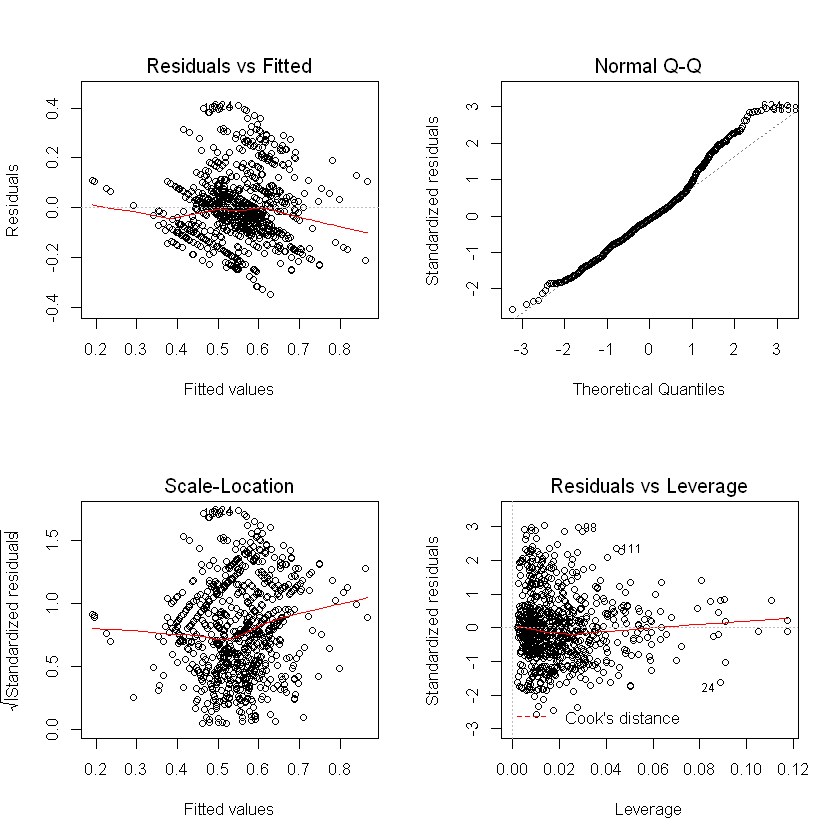

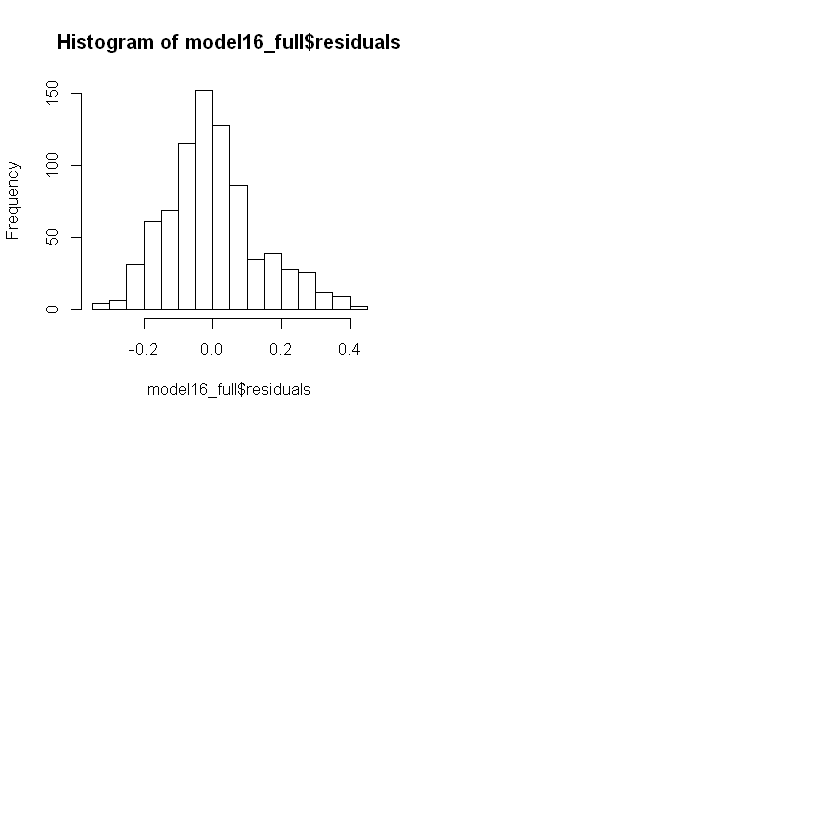

In [63]:
summary(model16_full)

par(mfrow=c(2,2))
plot(model16_full)
hist(model16_full$residuals)

Residuals seem to be normaly distributed and have mean around 0 with slight variance.